In [1]:
import satellite_images_nso.api.nso_georegion as nso
from settings import nso_username, nso_password, path_geojson,  output_path
# Optional
from settings import height_band_filepath, cloud_detection_model_path, links_must_contain

# Search for satellite images in geojson and download links

In [2]:
# Make a georegion object
georegion = nso.nso_georegion(
    path_to_geojson=path_geojson, 
    output_folder=output_path,
    username=nso_username,
    password=nso_password,
    )

In [3]:
# This methods finds all download links of satellite images which overlap for 50% or more with region in the geojson, starting from date 2022-01-01
links = georegion.retrieve_download_links(max_diff=0.5, start_date="2022-01-01")

Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.5
[[ 4.09474292  4.09336684  4.09321964  4.0929824   4.09244727  4.0923829
   4.0921686   4.09208999  4.09194116  4.0918085   4.09164425  4.09155625
   4.09140372  4.09139135  4.09116006  4.09078348  4.09036559  4.09025575
   4.09008812  4.09000108  4.08986714  4.08983466  4.08939655  4.08939633
   4.08868105  4.08865092  4.08862016  4.08852353  4.08845192  4.0883838
   4.0883268   4.08828329  4.08822013  4.08817304  4.08813663  4.08810338
   4.08806226  4.08789935  4.08784015  4.08777723  4.08768096  4.08758221
   4.08751482  4.08743433  4.08738508  4.08720377  4.08711659  4.08696898
   4.08690578  4.08679374  4.08673071  4.08662889  4.0865845   4.08658507
   4.08639951  4.08639753  4.08632677  4.08626957  4.08587426  4.08558033
   4.08514622  4.084624    4.08459993  4.08446053  4.08445678  4.08438296
   4.08427457  4.08396986  4.08347624  4.08318231  4.08314805  4.08305641
   4.08298687  4.0826865   4.

In [4]:
#Returns a pandas dataframe columns with: 1.The Download Link. 2.Percentage of satellite area which covers the selected submitted georegion 3.The polygon of what is missing compared with the submitted georegion. 4.The satellite images that cover the submitted georegion
# 5. The date when the satellite image was taken. 6. The satellite constellation. 7. The resolution of the satellite image
links

,link,percentage_geojson,missing_polygon,covered_polygon,date,satellite,resolution
0,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220324,SV1-03,200cm
1,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220324,SV1-03,50cm
2,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220324,SV1-03,50cm
3,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220324,SV1-03,50cm
4,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220324,SV1-03,None
...,...,...,...,...,...,...,...
123,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220315,SV1-04,200cm
124,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220315,SV1-04,50cm
125,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220315,SV1-04,50cm
126,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20220315,SV1-04,50cm


In [5]:
# Example filter on resolution and bands
links = links[links['resolution'] == "30cm"]
links = links[links["link"].str.contains("RGBNED")]

In [6]:
links

,link,percentage_geojson,missing_polygon,covered_polygon,date,satellite,resolution
41,https://api.satellietdataportaal.nl/v1/downloa...,0.986622,"POLYGON ((4.093366837244824 51.82977004171608,...","POLYGON ((4.094078734213333 51.83023257402013,...",20230315,PNEO-04,30cm
46,https://api.satellietdataportaal.nl/v1/downloa...,0.986622,"POLYGON ((4.093366837244824 51.82977004171608,...","POLYGON ((4.094078734213333 51.83023257402013,...",20230315,PNEO-04,30cm
51,https://api.satellietdataportaal.nl/v1/downloa...,0.688963,"POLYGON ((4.093366837244824 51.82977004171608,...","POLYGON ((4.088620161094335 51.83253197427545,...",20230421,PNEO-04,30cm
56,https://api.satellietdataportaal.nl/v1/downloa...,0.688963,"POLYGON ((4.093366837244824 51.82977004171608,...","POLYGON ((4.088620161094335 51.83253197427545,...",20230421,PNEO-04,30cm
71,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20230910,PNEO-03,30cm
76,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20230910,PNEO-03,30cm
91,https://api.satellietdataportaal.nl/v1/downloa...,0.602007,POLYGON ((4.081121086857167 51.838131721961545...,"POLYGON ((4.093366837244824 51.82977004171608,...",20230421,PNEO-04,30cm
96,https://api.satellietdataportaal.nl/v1/downloa...,0.602007,POLYGON ((4.081121086857167 51.838131721961545...,"POLYGON ((4.093366837244824 51.82977004171608,...",20230421,PNEO-04,30cm
101,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20230601,PNEO-04,30cm
106,https://api.satellietdataportaal.nl/v1/downloa...,0.996656,POLYGON EMPTY,"POLYGON ((4.093366837244824 51.82977004171608,...",20230601,PNEO-04,30cm


In [21]:
links = links.sort_values("percentage_geojson")

Searching for: E:/data/test\20230606_105315_PNEO-04_1_1**natura2000_solleveld_kapittelduinen*cropped*.tif
Found files: []
Starting download to: E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO.zip
Extracting files
Extracted folder is: E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO
cropping file E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier.tif
New cropped filename: E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduinen_cropped.tif
raster path opened
convert to RD
Error on making descriptions
Plotting data for:E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduine

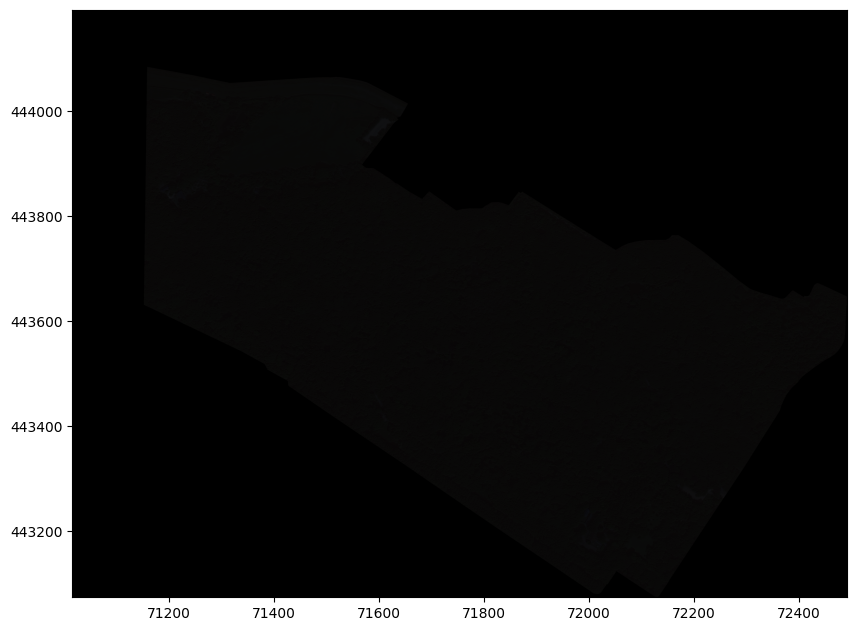

finished cropping E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RGB_8bit_PNEO\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier\20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier.tif
Cropped file is found at: E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduinen_cropped.tif
Succesfully cropped .tif file
E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduinen_cropped.tif is Ready
-----Filling satellite image with data from the nearest other satellite----
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.8
[[ 4.162148    4.162467    4.1625      4.162815    4.163475    4.163721
   4.164293    4.164899    4.165279    4.16681582  4.16683531  4.16595
   4.165712    4.16371     4.163564    4.15964     4.15931     4.155092
   4.15513     4.155183    4.15524     4.155301    4.155339    4.15743
   4.157816    4.158112    4.158392    4.159114    4.159397    4.159666
   4

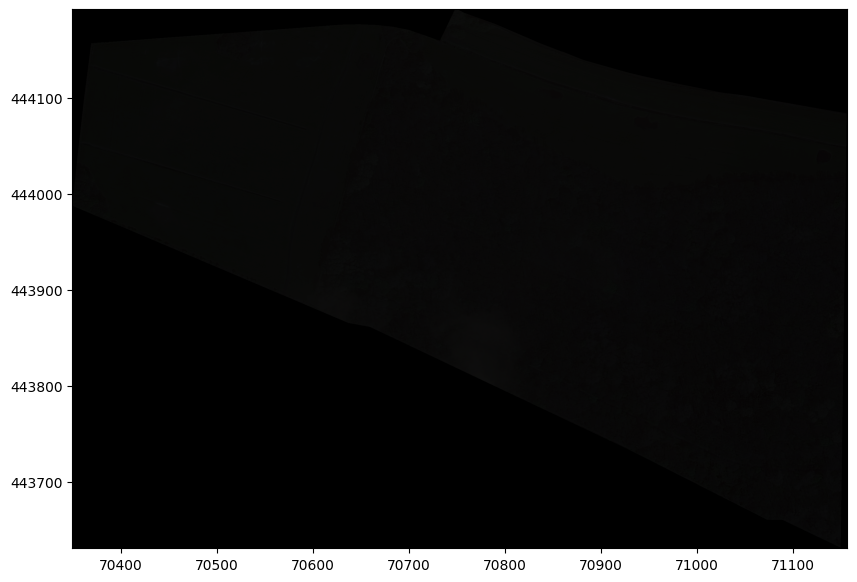

finished cropping E:/data/test/20230421_110811_PNEO-04_1_1_30cm_RGB_8bit_PNEO\20230421_110811_PNEO-04_1_1_30cm_RD_8bit_RGB_Oostvoorne\20230421_110811_PNEO-04_1_1_30cm_RD_8bit_RGB_Oostvoorne.tif
Cropped file is found at: E:/data/test/20230421_110811_PNEO-04_1_1_30cm_RD_8bit_RGB_Oostvoorne_fill_region_cropped.tif
Succesfully cropped .tif file
E:/data/test/20230421_110811_PNEO-04_1_1_30cm_RD_8bit_RGB_Oostvoorne_fill_region_cropped.tif is Ready
Merging: E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduinen_cropped.tif and E:/data/test/20230421_110811_PNEO-04_1_1_30cm_RD_8bit_RGB_Oostvoorne_fill_region_cropped.tif


'E:/data/test/20230606_105315_PNEO-04_1_1_30cm_RD_8bit_RGB_DeLier_natura2000_solleveld_kapittelduinen_cropped_filled.tif'

In [8]:
georegion.execute_link(links[1:2]["link"].values[0], fill_with_nearest_date= True, fill_coordinates=links[1:2]["missing_polygon"].values[0] )

# Download, Crop and calculate NDVI for a LandSat Image

### For a group of images 

In [ ]:
# loop through and download all the 50cm resolution RGBI SuperView images
for link in links:
    if all([substr in link for substr in links_must_contain]):
        print(link)
        try:
            georegion.execute_link(link, add_ndvi_band=True, add_height_band=height_band_filepath, cloud_detection_warning=True)
        except Exception as e:
            print(e)

# Normalize LandSat image

### Multi date relative normalisation.

In [ ]:
# Imports the normalisation library.
from satellite_images_nso.__normalisation import normalisation

# Path to a Superview satellite image.
path = "20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif"

normalisation.multidate_normalisation_75th_percentile(path)

### Black spot normalisation.

In [ ]:
path = "data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif"

In [ ]:
# The first argument here is the path to satellite image and the second is the name of the satellite image to get coefficients for, this can be filled in partially.
normalisation.multi_date_dark_spot_normalisation(path,"20210302")

# Other functionalities

In [ ]:
# The sat_manipulator gives other handy transmations on satellite data.
import satellite_images_nso.api.sat_manipulator as sat_manipulator

# This function reads a .tif file, which is a format the satellite data is stored in,  and converts it to a pixel based geopandas dataframe.
# For machine learning purposes.
path_to_vector = "path/to/folder/*.tif"
geo_df_pixel = sat_manipulator.tranform_vector_to_pixel_gpdf(path_to_vector)